In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [8]:
douglas = Table.read('data/douglas2017.vot')
douglas.add_index('EPIC')

In [5]:
fast = np.loadtxt('data/epics_fast.txt')
slow = np.loadtxt('data/epics_slow.txt')
superfast = np.loadtxt('data/epics_superfast.txt')

In [ ]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u

width = u.Quantity(0.1, u.arcmin)
height = u.Quantity(0.1, u.arcmin)

pops = []
for pop in [slow, fast, superfast]: 
    rows = []
    for i in range(len(pop)): 
        epic = int(pop[i])
        douglas_row = douglas.loc[epic]
        c = SkyCoord(ra=douglas_row['_RA']*u.deg, dec=douglas_row['_DE']*u.deg)
        
        r = Gaia.query_object_async(coordinate=c, width=width, height=height)
        min_dist = np.argmin(r['dist'])
        rows.append(r[min_dist])
    pops.append(rows)

In [36]:
from astropy.table import hstack

In [35]:
douglas_pops = []
for pop in [slow, fast, superfast]: 
    douglas_rows = []
    for i in range(len(pop)): 
        epic = int(pop[i])
        douglas_row = douglas.loc[epic]
        douglas_rows.append(douglas_row)
    douglas_pops.append(douglas_rows)

In [37]:
slow_table = hstack([Table(rows=pops[0], names=pops[0][0].colnames), Table(rows=douglas_pops[0], names=douglas_pops[0][0].colnames)])
fast_table = hstack([Table(rows=pops[1], names=pops[1][0].colnames), Table(rows=douglas_pops[1], names=douglas_pops[1][0].colnames)])
superfast_table = hstack([Table(rows=pops[2], names=pops[2][0].colnames), Table(rows=douglas_pops[2], names=douglas_pops[2][0].colnames)])

/Users/bmmorris/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


[Text(0, 0.5, 'G'), Text(0.5, 0, '$\\rm G_{BP} - G_{RP}$')]

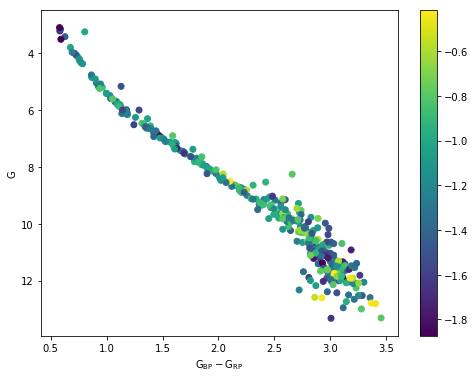

In [72]:
plt.figure(figsize=(8, 6))
for table in [slow_table, fast_table, superfast_table]:
    g = table['phot_g_mean_mag']
    bp_minus_rp = table['bp_rp']
    parallax = table['parallax'] * 1e-3

    G = g + 5 * (np.log10(parallax) + 1)

    cax = plt.scatter(bp_minus_rp, G, c=np.log10(table['SmAmp']))
cbar = plt.colorbar(cax)
plt.gca().invert_yaxis()
plt.gca().set(xlabel="$\\rm G_{BP} - G_{RP}$", ylabel='G')